First few rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Descriptive Statistics:
                           Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Mean                75.500000       5.843333      3.054000       3.758667   
Median              75.500000       5.800000      3.000000       4.350000   
Standard Deviation  43.445368       0.828066      0.433594       1.764420   
Skewness             0.000000       0.314911      0.334053      -0.274464   
Kurtosis            -1.200000      -0.552064      0.290781      -1.401921   

                    

<Figure size 800x600 with 0 Axes>

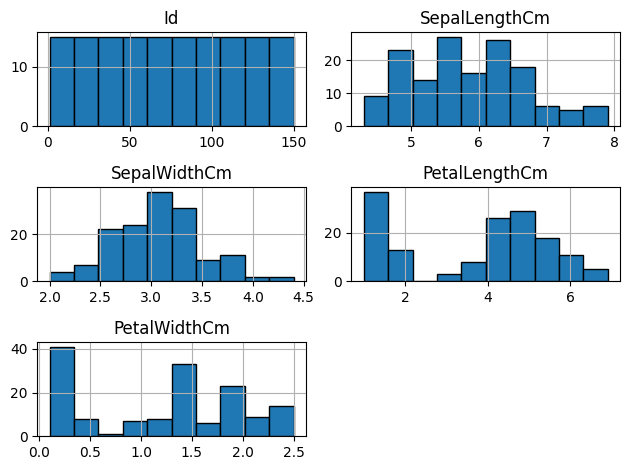

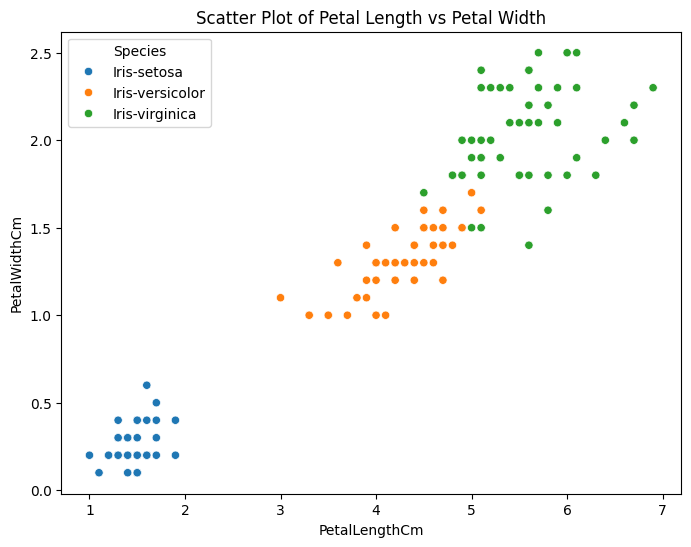

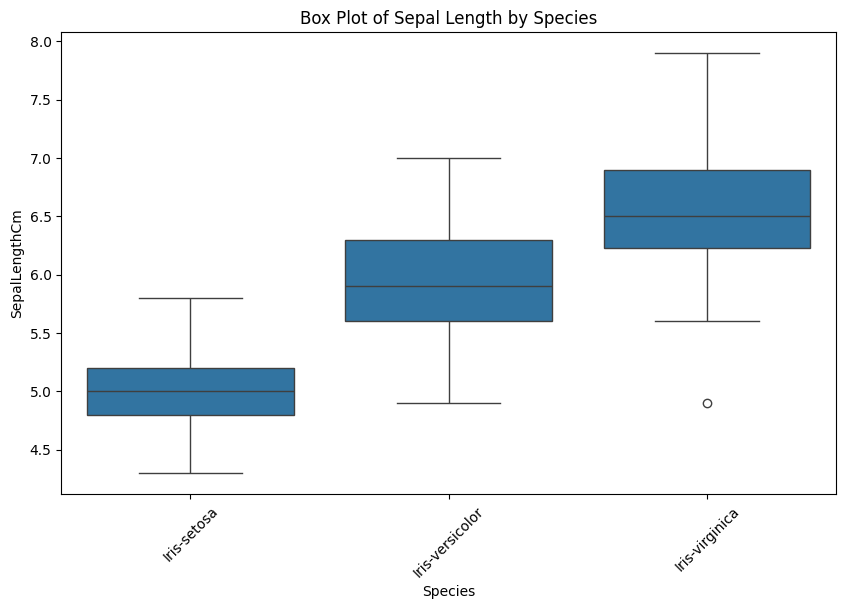

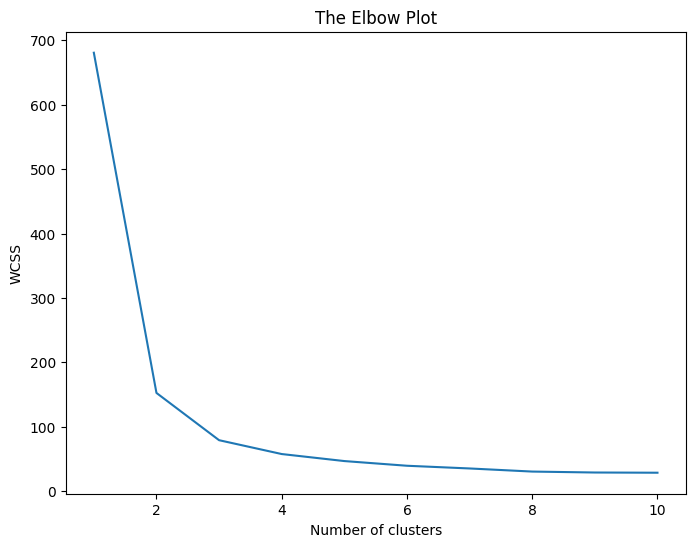

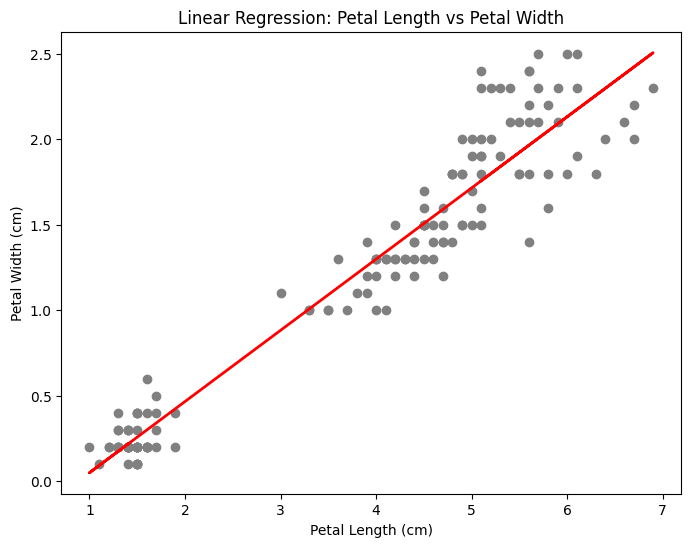


K-means Clustering Results:
Cluster
0    39
1    50
2    61
dtype: int64


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import skew, kurtosis

# Load the dataset
iris = pd.read_csv('Iris.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(iris.head())

# Calculate statistics
statistics = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Standard Deviation': std_dev,
    'Skewness': skew_values,
    'Kurtosis': kurt_values
})

# Transpose the DataFrame for better visualization
statistics = statistics.T

print("Descriptive Statistics:")
print(statistics)

# Rest of the code remains the same
# Plot 1: Histogram
plt.figure(figsize=(8, 6))
iris.hist(edgecolor='black', bins=10)
plt.tight_layout()
plt.show()

# Plot 2: Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=iris, hue='Species')
plt.title('Scatter Plot of Petal Length vs Petal Width')
plt.show()

# Plot 3: Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris, x='Species', y='SepalLengthCm')
plt.title('Box Plot of Sepal Length by Species')
plt.xticks(rotation=45)
plt.show()

# Plot 4: Elbow Plot for K-means Clustering
wcss = []
for i in range(1, 11):
   kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
   kmeans.fit(iris.iloc[:, 1:5])
   wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Plot 5: Line Fitting
X = iris['PetalLengthCm'].values.reshape(-1, 1)
y = iris['PetalWidthCm'].values

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='gray')
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.title('Linear Regression: Petal Length vs Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

# K-means Clustering
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(iris.iloc[:, 1:5])
iris['Cluster'] = kmeans.labels_

print("\nK-means Clustering Results:")
print(iris.groupby('Cluster').size())